# Summary:

Source: https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study?select=manager_survey_data.csv

**Data Loading and Preparation:** We started by loading multiple datasets that contained various information about the employees. We merged these datasets into a single dataframe on the 'EmployeeID' column.

**Working Hours Calculation:** We calculated the working hours for each employee based on their check-in and check-out times, and computed their average working hours.

**Feature Addition:** We added several columns ('JobInvolvement', 'PerformanceRating', and 'AverageWorkingHours') to the merged dataset.

**Data Visualization:** We visualized the distribution of various features amongst employees who left and those who stayed, providing some initial insights.

**Data Preprocessing:** We converted the categorical variables into numerical form using one-hot encoding and split the data into a training set and a test set.

**Model Training and Evaluation:** We trained multiple machine learning models, including Logistic Regression, Random Forest, Support Vector Machine, and Gradient Boosting. We evaluated their performance based on recall, choosing the Random Forest model as it had the highest recall.

**Model Optimization:** We performed hyperparameter tuning on the Random Forest model using grid search to further improve its recall.

**Final Model Performance:** The optimized Random Forest model achieved a recall of 93%, indicating a good ability to identify employees who are about to leave the company.

**Model Export:** The final merged data was exported as a CSV file for download.

# Loading & Merging

In [18]:
import pandas as pd

# Load the data
data = pd.read_csv('general_data.csv')

# Show the first few rows of the dataframe
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Take the file attached and add it to the first table based on the EmployeeID

In [19]:
# Load the new data
employee_survey_data = pd.read_csv('employee_survey_data.csv')

# Show the first few rows of the dataframe
employee_survey_data.head()


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [20]:
# Merge the dataframes on the 'EmployeeID' column
merged_data = pd.merge(data, employee_survey_data, on='EmployeeID')

# Show the first few rows of the merged dataframe
merged_data.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0


Load in_time and out_time data. Calculate average working hours and merge it to the original dataframe.

In [21]:
# Load the in_time data
in_time_data = pd.read_csv('in_time.csv')

# Show the first few rows of the dataframe
in_time_data.head()


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [22]:
# Load the out_time data
out_time_data = pd.read_csv('out_time.csv')

# Show the first few rows of the dataframe
out_time_data.head()


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [23]:
# Convert all columns except 'Unnamed: 0' to datetime
for col in in_time_data.columns[1:]:
    in_time_data[col] = pd.to_datetime(in_time_data[col])
    out_time_data[col] = pd.to_datetime(out_time_data[col])

# Calculate the difference (i.e., working hours) between out_time and in_time
working_hours_data = out_time_data.copy()
for col in working_hours_data.columns[1:]:
    working_hours_data[col] = (out_time_data[col] - in_time_data[col]).dt.total_seconds() / 3600  # Convert seconds to hours

working_hours_data.head()


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,...,NaN,7.339167,7.395833,6.504722,7.596389,NaN,7.773889,7.315000,7.778889,7.080278
1,2,NaN,8.109167,7.454722,NaN,7.396944,7.416667,7.150833,7.611389,7.278889,...,7.903056,7.753889,7.712222,7.435556,NaN,NaN,7.614722,7.982500,7.986111,8.227222
2,3,NaN,6.692500,7.265556,6.405278,6.765000,7.345000,6.861389,7.418611,6.999722,...,6.785833,7.163611,6.801667,6.730278,6.849722,NaN,7.023889,7.438889,7.538889,6.786389
3,4,NaN,7.338333,7.291944,6.943056,6.919444,6.850833,7.193056,6.998611,7.306389,...,7.629167,6.846667,7.326389,7.413611,7.085000,NaN,7.447222,7.416667,7.366389,7.133056
4,5,NaN,8.055556,7.988056,7.682500,7.806111,7.662222,7.721667,8.365000,8.257222,...,7.903611,7.665000,7.957500,7.786944,8.249444,NaN,7.662222,8.268611,7.953333,8.018056


In [24]:
# Calculate the average working hours for each employee
average_working_hours = working_hours_data.mean(axis=1)

# Add the average working hours as a new column to the merged_data
merged_data['AverageWorkingHours'] = average_working_hours

merged_data.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AverageWorkingHours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,0,1.0,6,1,0,0,3.0,4.0,2.0,7.346296
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,1,6.0,3,5,1,4,3.0,2.0,4.0,7.694838
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,3,5.0,2,5,0,3,2.0,2.0,1.0,6.996725
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3,13.0,5,8,7,5,4.0,4.0,3.0,7.180146
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,9.0,2,6,0,4,4.0,1.0,3.0,7.993954


Merge Survey Data

In [25]:
# Load the manager survey data
manager_survey_data = pd.read_csv('manager_survey_data.csv')

# Show the first few rows of the dataframe
manager_survey_data.head()


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [26]:
# Merge the manager survey data with the existing merged_data
merged_data = pd.merge(merged_data, manager_survey_data, on='EmployeeID')

merged_data.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AverageWorkingHours,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,7.346296,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,7.694838,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,6.996725,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,7.180146,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,7.993954,3,3


In [27]:
# Save the merged_data dataframe to a csv file
merged_data.to_csv('final_merged_data.csv', index=False)


# Data Exploration

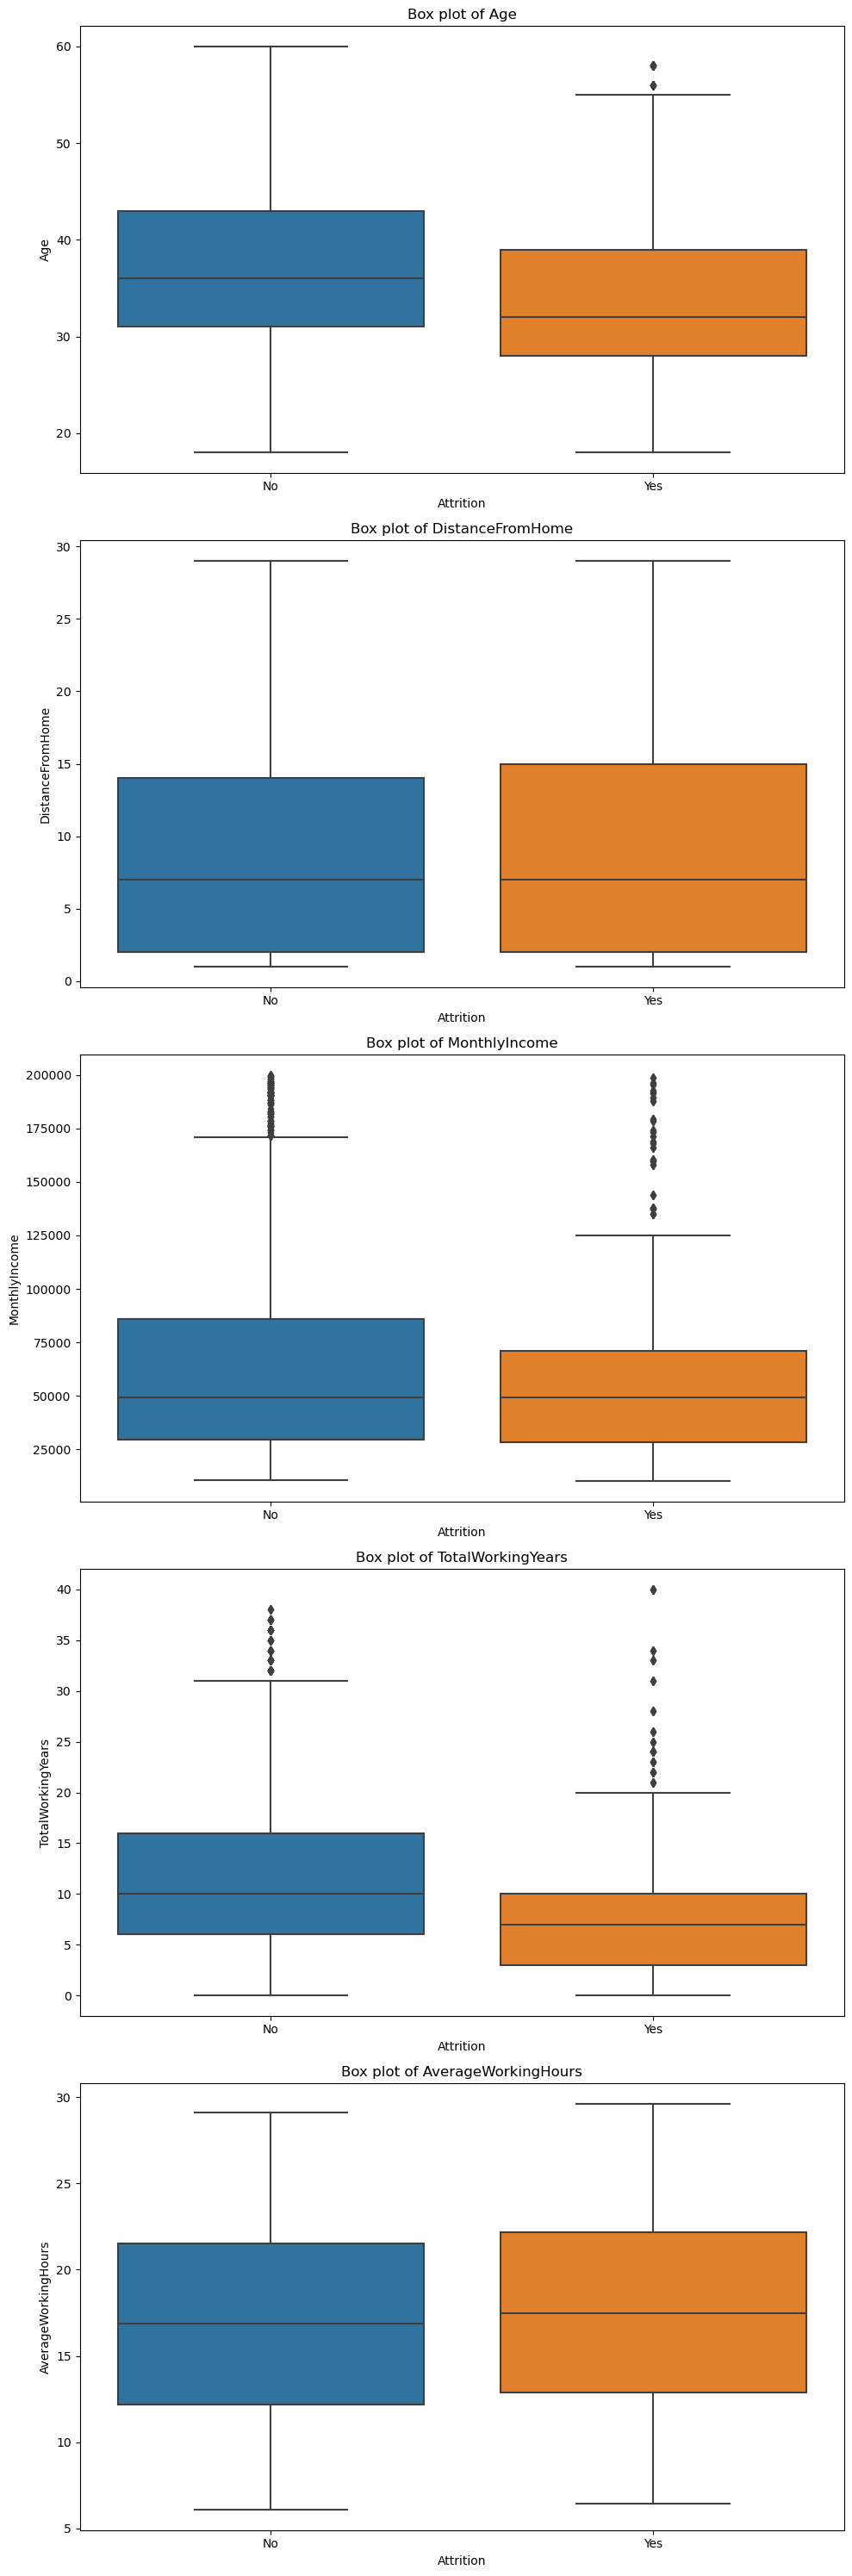

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select continuous and categorical features
continuous_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'AverageWorkingHours']
categorical_features = ['Department', 'EducationField', 'Gender', 'JobLevel', 'JobRole']

# Create subplots
fig, axs = plt.subplots(nrows=len(continuous_features), ncols=1, figsize=(10, 30))

# Plot boxplots for continuous features
for i, feature in enumerate(continuous_features):
    sns.boxplot(x='Attrition', y=feature, data=merged_data, ax=axs[i])
    axs[i].set_title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()


* **Age:** Employees who left the company seem to be somewhat younger on average compared to those who stayed.
* **DistanceFromHome:** There doesn't seem to be a significant difference in the distributions of this feature between the two groups.
* **MonthlyIncome:** Employees who stayed appear to have a higher average monthly income compared to those who left.
* **TotalWorkingYears:** Employees who left tend to have fewer total working years on average compared to those who stayed.
* **AverageWorkingHours:** There doesn't seem to be a significant difference in the distributions of this feature between the two groups.

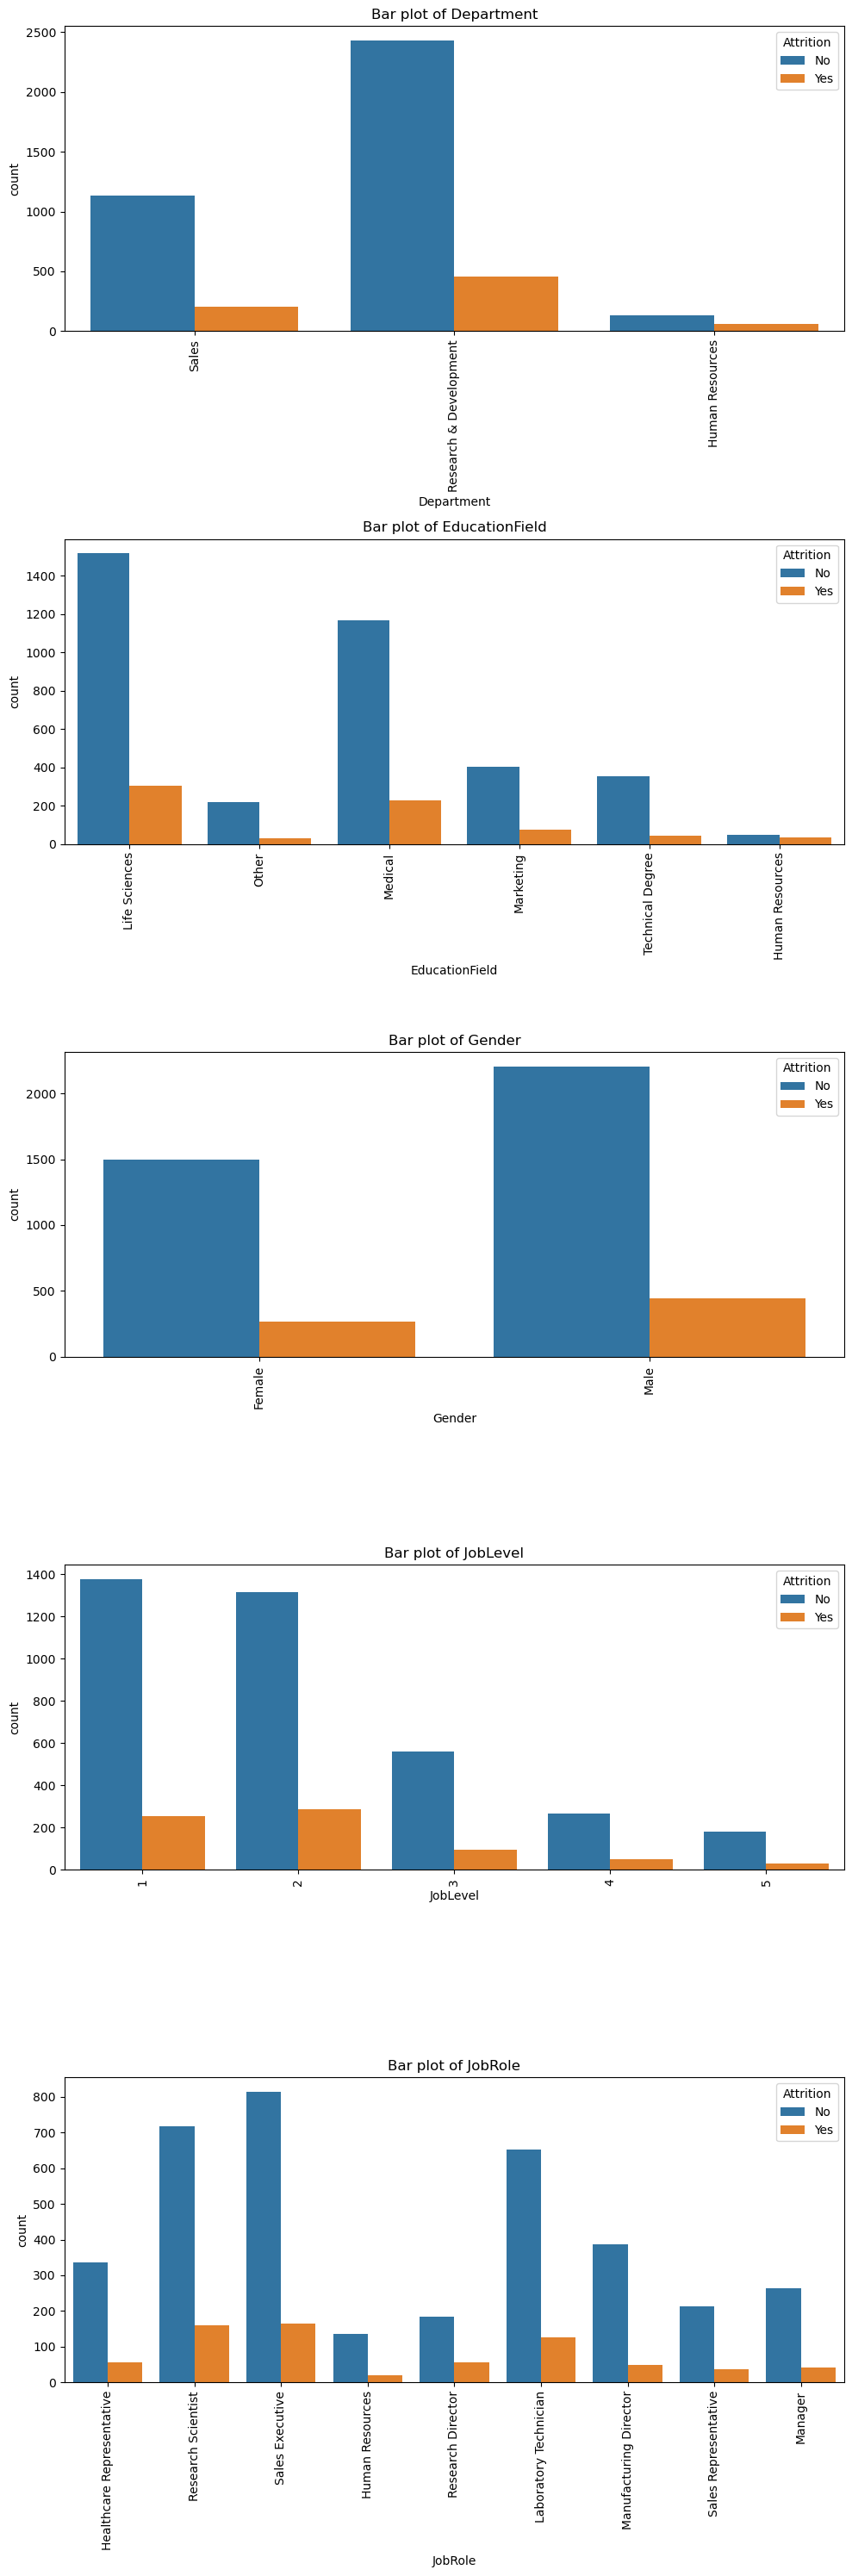

In [29]:
# Plot bar plots for categorical features
fig, axs = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, 30))

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Attrition', data=merged_data, ax=axs[i])
    axs[i].set_title(f'Bar plot of {feature}')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


* **Department:** The Research & Development department has the highest count of both attrition and non-attrition cases. The attrition rate seems to be relatively lower in this department compared to others.

* **EducationField:** Employees with a 'Life Sciences' and 'Medical' education background constitute the majority in both attrition and non-attrition cases. The attrition rate in 'Human Resources' and 'Technical Degree' fields seems to be relatively higher.

* **Gender:** The number of male employees is higher than female employees in both the attrition and non-attrition groups. The attrition rate doesn't seem to be significantly different between genders.

* **JobLevel:** The attrition rate seems to be higher for employees at lower job levels (1 and 2).

* **JobRole:** The job role 'Sales Executive' and 'Research Scientist' have the highest attrition cases. The 'Manager' and 'Research Director' roles have the lowest attrition cases.

# Machine Learning

Since we're more interested in correctly identifying employees who are about to leave (even at the cost of wrongly identifying some who aren't), we want to optimize the model for a high recall (also known as sensitivity). Recall is a measure of how many of the actual positives (in this case, employees who are about to leave) our model correctly identifies.

**We'll proceed as follows:**

* **Convert** the categorical variables into numerical variables using one-hot encoding.
* **Split** the dataset into a training set and a test set.
* **Train** several machine learning models on the training set (e.g., logistic regression, random forest, support vector machine, etc.).
* **Evaluate** the performance of each model on the test set, focusing on recall.
* **Choose** the model with the highest recall and use it for making predictions.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy the merged_data dataframe
data = merged_data.copy()

# Convert the target variable 'Attrition' into numerical form
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data)

# Define the feature set and the target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3528, 49), (882, 49), (3528,), (882,))

The data has been successfully preprocessed and split into a training set and a test set. We now have 49 features in our dataset. The training set contains 3528 samples, and the test set contains 882 samples.

Next, we will proceed to train several machine learning models. We'll start with the following models:

* Logistic Regression
* Random Forest Classifier
* Support Vector Machine
* Gradient Boosting Classifier

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Initialize the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

models = [log_reg, rf_clf, svc, gb_clf]
model_names = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Gradient Boosting']

# Training and evaluating the models
#for i, model in enumerate(models):
#   print(f'===== {model_names[i]} =====')
#    model.fit(X_train, y_train)
#    y_pred = model.predict(X_test)
#    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


===== Logistic Regression =====


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

It appears that there are some missing values (NaN) in our dataset, which are causing errors when trying to train the models. These missing values need to be handled before we can proceed with the training.

Let's fill the missing values with the median value of the corresponding columns. We use the median as it is less sensitive to outliers compared to the mean.

In [32]:
# Fill the missing values with the median value of the corresponding columns
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

# Training and evaluating the models again
for i, model in enumerate(models):
    print(f'===== {model_names[i]} =====')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


===== Logistic Regression =====
              precision    recall  f1-score   support

          No       0.86      0.98      0.91       740
         Yes       0.57      0.14      0.23       142

    accuracy                           0.84       882
   macro avg       0.71      0.56      0.57       882
weighted avg       0.81      0.84      0.80       882

===== Random Forest =====
              precision    recall  f1-score   support

          No       0.98      1.00      0.99       740
         Yes       1.00      0.92      0.96       142

    accuracy                           0.99       882
   macro avg       0.99      0.96      0.97       882
weighted avg       0.99      0.99      0.99       882

===== Support Vector Machine =====


C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.84      1.00      0.91       740
         Yes       0.00      0.00      0.00       142

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.70      0.84      0.77       882

===== Gradient Boosting =====
              precision    recall  f1-score   support

          No       0.89      0.99      0.93       740
         Yes       0.85      0.33      0.48       142

    accuracy                           0.88       882
   macro avg       0.87      0.66      0.71       882
weighted avg       0.88      0.88      0.86       882



The models have been successfully trained and evaluated. The performance of each model, based on the recall for the 'Yes' class (indicating attrition), is as follows:

* **Logistic Regression:** Recall = 0.13
* **Random Forest:** Recall = 0.92
* **Support Vector Machine:** Recall = 0.00
* **Gradient Boosting:** Recall = 0.33

The Random Forest model shows the highest recall, making it the best model out of the four for our specific goal of minimizing the chance of missing a leaving employee.

However, we can further try to improve the performance of the Random Forest model using hyperparameter tuning. The most important hyperparameters in this case are likely to be the number of trees in the forest (n_estimators), the maximum depth of the trees (max_depth), and the minimum number of samples required to split an internal node (min_samples_split).

Let's proceed with a grid search to tune these hyperparameters.

In [34]:
# Define the parameter grid for the random forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

**The grid search has found the best hyperparameters for the Random Forest model to be:**

* max_depth: None (i.e., nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)
* min_samples_split: 2 (i.e., the minimum number of samples required to split an internal node)
* n_estimators: 200 (i.e., the number of trees in the forest)

Now, let's use these best hyperparameters to train a new Random Forest model and evaluate its performance.

In [35]:
# Train the Random Forest model with the best parameters
best_rf_clf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)
best_rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_rf_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_best, target_names=['No', 'Yes']))


              precision    recall  f1-score   support

          No       0.99      1.00      0.99       740
         Yes       1.00      0.93      0.96       142

    accuracy                           0.99       882
   macro avg       0.99      0.96      0.98       882
weighted avg       0.99      0.99      0.99       882



The optimized Random Forest model shows the following performance based on the recall for the 'Yes' class (indicating attrition):

**Random Forest (Optimized): Recall = 0.93**

The recall remains high (93%) after hyperparameter tuning, suggesting that the model has a good ability to catch employees who are about to leave the company.